#### Problem statement

Predict the political party from the tweet text and the handle

#### Data description
This dataset has three columns - label (party name), twitter handle, tweet text


#### Problem Description:

Design a feed forward deep neural network to predict the political party using the pytorch or tensorflow.
Build two models

1. Without using the handle

2. Using the handle


#### Deliverables

- Report the performance on the test set.

- Try multiple models and with different hyperparameters. Present the results of each model on the test set. No need to create a dev set.

- Experiment with:
    -L2 and dropout regularization techniques
    -SGD, RMSProp and Adamp optimization techniques



- Creating a fixed-sized vocabulary: Give a unique id to each word in your selected vocabulary and use it as the input to the network

    - Option 1: Feedforward networks can only handle fixed-sized inputs. You can choose to have a fixed-sized K words from the tweet text (e.g. the first K word, randomly selected K word etc.). K can be a hyperparameter.

    - Option 2: you can choose top N (e.g. N=1000) frequent words from the dataset and use an N-sized input layer. If a word is present in a tweet, pass the id, 0 otherwise
    
    -  Clearly state your design choices and assumptions. Think about the pros and cons of each option.



<b> Tabulate your results, either at the end of the code file or in the text box on the submission page. The final result should have:</b>

1. Experiment description

2. Hyperparameter used and their values

3. Performance on the test set



### Importing libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras

In [2]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import MeanSquaredError
import matplotlib.pyplot as plt

In [3]:
df_party_tweets=pd.read_csv('/content/sample_data/train.csv')
df_party_tweets

,Unnamed: 0,Party,Handle,Tweet
0,0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P..."
1,1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...
2,2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...
3,3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...
4,4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...
...,...,...,...,...
72730,86455,Republican,RepTomPrice,Check out my op-ed on need for End Executive O...
72731,86456,Republican,RepTomPrice,"Yesterday, Betty &amp; I had a great time lear..."
72732,86457,Republican,RepTomPrice,We are forever grateful for the service and sa...
72733,86458,Republican,RepTomPrice,Happy first day of school @CobbSchools! #CobbB...


### Performing EDA

In [4]:
df_party_tweets.Party.value_counts()

Republican    37446
Democrat      35288
Name: Party, dtype: int64

In [5]:
df_party_tweets.nunique()

Unnamed: 0    72735
Party             2
Handle          433
Tweet         71197
dtype: int64

In [6]:
df_party_tweets.isna().sum()

Unnamed: 0    0
Party         1
Handle        1
Tweet         1
dtype: int64

In [7]:
df_party_tweets[df_party_tweets.Party.isna()==True]

,Unnamed: 0,Party,Handle,Tweet
35282,https://t.co/sbSljdw1Zw,NaN,NaN,NaN


In [8]:
#drop na
df_party_tweets=df_party_tweets.dropna()
df_party_tweets

,Unnamed: 0,Party,Handle,Tweet
0,0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P..."
1,1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...
2,2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...
3,3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...
4,4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...
...,...,...,...,...
72730,86455,Republican,RepTomPrice,Check out my op-ed on need for End Executive O...
72731,86456,Republican,RepTomPrice,"Yesterday, Betty &amp; I had a great time lear..."
72732,86457,Republican,RepTomPrice,We are forever grateful for the service and sa...
72733,86458,Republican,RepTomPrice,Happy first day of school @CobbSchools! #CobbB...


In [9]:
df_party_tweets[df_party_tweets.Party.isna()==True]

,Unnamed: 0,Party,Handle,Tweet


In [10]:
dfnew=df_party_tweets.groupby(['Handle']).Party.value_counts()

In [11]:
df_party_tweets

,Unnamed: 0,Party,Handle,Tweet
0,0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P..."
1,1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...
2,2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...
3,3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...
4,4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...
...,...,...,...,...
72730,86455,Republican,RepTomPrice,Check out my op-ed on need for End Executive O...
72731,86456,Republican,RepTomPrice,"Yesterday, Betty &amp; I had a great time lear..."
72732,86457,Republican,RepTomPrice,We are forever grateful for the service and sa...
72733,86458,Republican,RepTomPrice,Happy first day of school @CobbSchools! #CobbB...


In [12]:

df_party_tweets.dtypes

Unnamed: 0    object
Party         object
Handle        object
Tweet         object
dtype: object

In [13]:
df_party_tweets['Tweet'] = df_party_tweets['Tweet'].astype("string")

<ipython-input-13-970997e756ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_party_tweets['Tweet'] = df_party_tweets['Tweet'].astype("string")


In [14]:
df_party_tweets.dtypes

Unnamed: 0    object
Party         object
Handle        object
Tweet         string
dtype: object

## Performing Data Cleaning
### performing stop words removal, lematization, removing junk words

In [15]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
def tokenisation_stop_word_removal_lemmatize(tweet_):
  # Tokenize the text into words

  tweet_=str(tweet_)

  tweet_ = re.sub(r'http\S+', '', tweet_)
  tweet_ = tweet_.replace('RT','')


  words = word_tokenize(tweet_)# Get the English stop words



  #stop words removal
  stop_words = set(stopwords.words('english'))
  filtered_words=[]

  for i in words:
    i=i.lower()
    if i not in stop_words:
      filtered_words.append(i)

    #lemmatize text
  lemmatizer = WordNetLemmatizer()
  lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
  removal_list=["’",'s','"','t…','amp','&','…',"'s",'u', '“', '”','a…','m','–','to…', 'th…']
  new_filtered_list=[]
  for i in lemmatized_words:
    i=i.lower()
    if i not in removal_list and '…' not in i :
      new_filtered_list.append(i)

  # Join the filtered words back into a sentence
  filtered_sentence = ' '.join(new_filtered_list)

  text_without_urls = re.sub(r'#\s+', '#', filtered_sentence)
  text_without_urls = re.sub(r'@\s+', '@', text_without_urls)

  return text_without_urls


In [17]:
df_party_tweets['clean_text_tweet'] = df_party_tweets['Tweet'].apply(tokenisation_stop_word_removal_lemmatize)
df_party_tweets

<ipython-input-17-7886afb8d7cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_party_tweets['clean_text_tweet'] = df_party_tweets['Tweet'].apply(tokenisation_stop_word_removal_lemmatize)


,Unnamed: 0,Party,Handle,Tweet,clean_text_tweet
0,0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P...","today , senate dems vote #savetheinternet . pr..."
1,1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...,@winterhavensun : winter resident / alta vista...
2,2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...,@nbclatino : . @repdarrensoto noted hurricane ...
3,3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...,@nalcabpolicy : meeting @repdarrensoto . thank...
4,4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...,@vegalteno : hurricane season start june 1st ;...
...,...,...,...,...,...
72730,86455,Republican,RepTomPrice,Check out my op-ed on need for End Executive O...,check op-ed need end executive overreach act :...
72731,86456,Republican,RepTomPrice,"Yesterday, Betty &amp; I had a great time lear...","yesterday , betty ; great time learning forest..."
72732,86457,Republican,RepTomPrice,We are forever grateful for the service and sa...,forever grateful service sacrifice major barney .
72733,86458,Republican,RepTomPrice,Happy first day of school @CobbSchools! #CobbB...,happy first day school @cobbschools ! #cobbbac...


### Check how clean data is

In [18]:
from collections import Counter
import string
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = word_tokenize(text)
    return words

# Apply preprocessing and tokenize
df_party_tweets['tokenized_text'] = df_party_tweets['clean_text_tweet'].apply(preprocess_text)

# Count word frequency
word_frequencies = Counter()

# Update word frequencies for each row
for _, row in df_party_tweets.iterrows():
    word_frequencies.update(row['tokenized_text'])

# Convert word frequencies to a DataFrame
word_freq_df = pd.DataFrame(word_frequencies.items(), columns=['Word', 'Frequency'])

# Sort by frequency in descending order
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

word_freq_df

<ipython-input-18-d5e6bab95bb2>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_party_tweets['tokenized_text'] = df_party_tweets['clean_text_tweet'].apply(preprocess_text)


,Word,Frequency
0,today,7277
89,great,3796
86,american,3463
1041,tax,3358
55,thank,3244
...,...,...
27968,diplomatsclose,1
27967,usdoj,1
27965,workable,1
27964,clinch,1


### Data preparation for modelling

In [19]:
from sklearn.preprocessing import LabelEncoder
X = df_party_tweets['clean_text_tweet']
y = LabelEncoder().fit_transform(df_party_tweets['Party'])

In [20]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [21]:
X

0        today , senate dems vote #savetheinternet . pr...
1        @winterhavensun : winter resident / alta vista...
2        @nbclatino : . @repdarrensoto noted hurricane ...
3        @nalcabpolicy : meeting @repdarrensoto . thank...
4        @vegalteno : hurricane season start june 1st ;...
                               ...                        
72730    check op-ed need end executive overreach act :...
72731    yesterday , betty ; great time learning forest...
72732    forever grateful service sacrifice major barney .
72733    happy first day school @cobbschools ! #cobbbac...
72734    #zika fear realized florida . house gop acted ...
Name: clean_text_tweet, Length: 72734, dtype: object

## Test train splitting

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Data preperation prior to be processed by NN

In [23]:
# Tokenize the text data
max_words = 5000  # Maximum number of words to keep
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)


In [24]:
tokenizer

In [25]:
# Convert text to sequences of integers
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to a fixed length
max_len = 50  # Maximum length of a sequence
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

In [26]:
X_train_pad.shape

(58187, 50)

In [27]:
X_test_pad

array([[   0,    0,    0, ..., 1058,   60,  222],
       [   0,    0,    0, ...,  122, 4167, 4167],
       [   0,    0,    0, ...,   39,   28,   61],
       ...,
       [   0,    0,    0, ...,  824,  181,  292],
       [   0,    0,    0, ..., 1406, 2398, 1383],
       [   0,    0,    0, ...,  311,   25,  385]], dtype=int32)

In [28]:
X_train.shape

(58187,)

#Model 1: Building a neural network model using the Tweets

### Experimenting with SGD and a basic neural netwrok

In [29]:
from tensorflow.keras.layers import Dense, Dropout
embedding_dim = 50
from tensorflow.keras.regularizers import l2
model = keras.Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),
    keras.layers.Flatten(input_shape=(50, 50)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 50)            250000    
                                                                 
 flatten (Flatten)           (None, 2500)              0         
                                                                 
 dense (Dense)               (None, 128)               320128    
                                                                 
 dense_1 (Dense)             (None, 1024)              132096    
                                                                 
 dense_2 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 703249 (2.68 MB)
Trainable params: 703249 (2.68 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
from tensorflow.keras.optimizers import Adam
# Compile the model
model.compile(optimizer=SGD(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [31]:
batch_size = 64
epochs = 5
model.fit(X_train_pad, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test_pad, y_test))

Epoch 1/5
910/910 [==============================] - 20s 16ms/step - loss: 0.6929 - accuracy: 0.5146 - val_loss: 0.6928 - val_accuracy: 0.5150
Epoch 2/5
910/910 [==============================] - 6s 6ms/step - loss: 0.6928 - accuracy: 0.5148 - val_loss: 0.6927 - val_accuracy: 0.5150
Epoch 3/5
910/910 [==============================] - 4s 4ms/step - loss: 0.6927 - accuracy: 0.5148 - val_loss: 0.6927 - val_accuracy: 0.5150
Epoch 4/5
910/910 [==============================] - 4s 5ms/step - loss: 0.6927 - accuracy: 0.5148 - val_loss: 0.6927 - val_accuracy: 0.5150
Epoch 5/5
910/910 [==============================] - 6s 6ms/step - loss: 0.6927 - accuracy: 0.5148 - val_loss: 0.6927 - val_accuracy: 0.5150


### The test and train accuracy is very poor at 51.5%

### Experimenting with more complex neural network with more layers and different activation function

In [32]:
from tensorflow.keras.layers import Dense, Dropout
embedding_dim = 50
from tensorflow.keras.regularizers import l2
model = keras.Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),
    keras.layers.Flatten(input_shape=(50, 50)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dense(512, activation='elu'),
    Dropout(0.5),
    keras.layers.Dense(256, activation='tanh'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 50)            250000    
                                                                 
 flatten_1 (Flatten)         (None, 2500)              0         
                                                                 
 dense_3 (Dense)             (None, 128)               320128    
                                                                 
 dense_4 (Dense)             (None, 1024)              132096    
                                                                 
 dense_5 (Dense)             (None, 512)               524800    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 256)              

In [33]:
from tensorflow.keras.optimizers import Adam
# Compile the model
model.compile(optimizer=SGD(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
# Train the model
batch_size = 32
epochs = 5
model.fit(X_train_pad, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test_pad, y_test))

Epoch 1/5
1819/1819 [==============================] - 18s 9ms/step - loss: 0.6927 - accuracy: 0.5152 - val_loss: 0.6927 - val_accuracy: 0.5150
Epoch 2/5
1819/1819 [==============================] - 10s 5ms/step - loss: 0.6927 - accuracy: 0.5148 - val_loss: 0.6926 - val_accuracy: 0.5150
Epoch 3/5
1819/1819 [==============================] - 10s 6ms/step - loss: 0.6927 - accuracy: 0.5149 - val_loss: 0.6926 - val_accuracy: 0.5150
Epoch 4/5
1819/1819 [==============================] - 10s 5ms/step - loss: 0.6927 - accuracy: 0.5148 - val_loss: 0.6926 - val_accuracy: 0.5150
Epoch 5/5
1819/1819 [==============================] - 9s 5ms/step - loss: 0.6926 - accuracy: 0.5147 - val_loss: 0.6926 - val_accuracy: 0.5150


## Experimenting with RMSprop

In [35]:
from tensorflow.keras.optimizers import RMSprop
# Compile the model
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [36]:
# Train the model
batch_size = 32
epochs = 5
model.fit(X_train_pad, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test_pad, y_test))

Epoch 1/5
1819/1819 [==============================] - 24s 12ms/step - loss: 0.5773 - accuracy: 0.6659 - val_loss: 0.5016 - val_accuracy: 0.7474
Epoch 2/5
1819/1819 [==============================] - 12s 6ms/step - loss: 0.4548 - accuracy: 0.7785 - val_loss: 0.4885 - val_accuracy: 0.7516
Epoch 3/5
1819/1819 [==============================] - 9s 5ms/step - loss: 0.3860 - accuracy: 0.8212 - val_loss: 0.5492 - val_accuracy: 0.7378
Epoch 4/5
1819/1819 [==============================] - 10s 5ms/step - loss: 0.3220 - accuracy: 0.8581 - val_loss: 0.5841 - val_accuracy: 0.7298
Epoch 5/5
1819/1819 [==============================] - 10s 6ms/step - loss: 0.2680 - accuracy: 0.8889 - val_loss: 0.6199 - val_accuracy: 0.7226


### We see a significant improvement in accuracy, lets see if we can better this with Adam

In [37]:
from tensorflow.keras.optimizers import Adam
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
# Train the model
batch_size = 32
epochs = 5
model.fit(X_train_pad, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test_pad, y_test))

Epoch 1/5
1819/1819 [==============================] - 30s 15ms/step - loss: 0.2504 - accuracy: 0.8965 - val_loss: 0.6264 - val_accuracy: 0.7181
Epoch 2/5
1819/1819 [==============================] - 10s 6ms/step - loss: 0.1614 - accuracy: 0.9372 - val_loss: 0.8733 - val_accuracy: 0.7220
Epoch 3/5
1819/1819 [==============================] - 11s 6ms/step - loss: 0.1140 - accuracy: 0.9564 - val_loss: 0.9601 - val_accuracy: 0.7170
Epoch 4/5
1819/1819 [==============================] - 10s 5ms/step - loss: 0.0913 - accuracy: 0.9660 - val_loss: 0.9200 - val_accuracy: 0.7152
Epoch 5/5
1819/1819 [==============================] - 10s 6ms/step - loss: 0.0746 - accuracy: 0.9738 - val_loss: 1.0136 - val_accuracy: 0.7183


## We see no major improvement in accuracy, let's experiment with dropout and L2 regression as we see the model overfit.


In [38]:
from tensorflow.keras.layers import Dense, Dropout
embedding_dim = 50
from tensorflow.keras.regularizers import l2
model = keras.Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),
    keras.layers.Flatten(input_shape=(50, 50)),
    keras.layers.Dense(128, activation='relu'),
    Dropout(0.5),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dense(512, activation='elu',kernel_regularizer=l2(0.00001)),
    Dropout(0.5),
    keras.layers.Dense(256, activation='tanh', kernel_regularizer=l2(0.00001)),
    keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 50)            250000    
                                                                 
 flatten_2 (Flatten)         (None, 2500)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               320128    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 1024)              132096    
                                                                 
 dense_10 (Dense)            (None, 512)               524800    
                                                                 
 dropout_2 (Dropout)         (None, 512)              

In [39]:
from tensorflow.keras.optimizers import Adam
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [40]:
# Train the model
batch_size = 16
epochs = 10
model.fit(X_train_pad, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test_pad, y_test))


Epoch 1/10
3637/3637 [==============================] - 35s 9ms/step - loss: 0.5599 - accuracy: 0.6944 - val_loss: 0.4826 - val_accuracy: 0.7612
Epoch 2/10
3637/3637 [==============================] - 21s 6ms/step - loss: 0.4301 - accuracy: 0.7922 - val_loss: 0.4743 - val_accuracy: 0.7593
Epoch 3/10
3637/3637 [==============================] - 20s 5ms/step - loss: 0.3510 - accuracy: 0.8383 - val_loss: 0.5036 - val_accuracy: 0.7505
Epoch 4/10
3637/3637 [==============================] - 22s 6ms/step - loss: 0.2859 - accuracy: 0.8721 - val_loss: 0.6384 - val_accuracy: 0.7409
Epoch 5/10
3637/3637 [==============================] - 21s 6ms/step - loss: 0.2426 - accuracy: 0.8950 - val_loss: 0.7110 - val_accuracy: 0.7358
Epoch 6/10
3637/3637 [==============================] - 21s 6ms/step - loss: 0.2114 - accuracy: 0.9101 - val_loss: 0.7223 - val_accuracy: 0.7395
Epoch 7/10
3637/3637 [==============================] - 19s 5ms/step - loss: 0.1910 - accuracy: 0.9207 - val_loss: 0.7079 - val_ac

### we see a small rise in accuracy now ass accuracy increased from 72% to 73%

In [41]:
#Once your model is trained, you need to evaluate its performance on a separate test dataset to assess its accuracy and other relevant metrics.
#You can use the following code for evaluation

test_loss, test_accuracy = model.evaluate(X_test_pad, y_test)
print("Test accuracy:", test_accuracy)


455/455 [==============================] - 1s 3ms/step - loss: 0.8818 - accuracy: 0.7359
Test accuracy: 0.7358905673027039


### Let's cross validate with the testing data to check how well the model genralised

In [126]:
df_X_test=pd.read_csv('/content/sample_data/test.csv')
df_X_test

,Unnamed: 0,Party,Handle,Tweet
0,1009,Democrat,RepBarragan,"Join me next Friday, May 18 in #Lynwood for ou..."
1,1025,Democrat,RepBarragan,The administration announced its plan today to...
2,1029,Democrat,RepBarragan,Today’s @SouthGateCAgov’s JAA Opening Day Cere...
3,1031,Democrat,RepBarragan,Great visit @Compton_YB! TY for creating a pos...
4,1035,Democrat,RepBarragan,Tune into my Water Quality Town Hall live feed...
...,...,...,...,...
13721,84986,Republican,michaelcburgess,"Forty-five years ago today, Rep. Sam Johnson r..."
13722,84987,Republican,michaelcburgess,Yesterday we all were deeply saddened by the e...
13723,84990,Republican,michaelcburgess,The White House has released a Statement of Ad...
13724,84992,Republican,michaelcburgess,Today I had a productive meeting with @SecAzar...


In [127]:
df_X_test['clean_text_tweet'] = df_X_test['Tweet'].apply(tokenisation_stop_word_removal_lemmatize)
df_X_test

,Unnamed: 0,Party,Handle,Tweet,clean_text_tweet
0,1009,Democrat,RepBarragan,"Join me next Friday, May 18 in #Lynwood for ou...","join next friday , may 18 #lynwood 2018 #congr..."
1,1025,Democrat,RepBarragan,The administration announced its plan today to...,administration announced plan today * intentio...
2,1029,Democrat,RepBarragan,Today’s @SouthGateCAgov’s JAA Opening Day Cere...,today @southgatecagov jaa opening day ceremony...
3,1031,Democrat,RepBarragan,Great visit @Compton_YB! TY for creating a pos...,great visit @compton_yb ! ty creating positive...
4,1035,Democrat,RepBarragan,Tune into my Water Quality Town Hall live feed...,tune water quality town hall live feed facebook :
...,...,...,...,...,...
13721,84986,Republican,michaelcburgess,"Forty-five years ago today, Rep. Sam Johnson r...","forty-five year ago today , rep. sam johnson r..."
13722,84987,Republican,michaelcburgess,Yesterday we all were deeply saddened by the e...,yesterday deeply saddened evil attack parkland...
13723,84990,Republican,michaelcburgess,The White House has released a Statement of Ad...,white house released statement administrative ...
13724,84992,Republican,michaelcburgess,Today I had a productive meeting with @SecAzar...,today productive meeting @secazar discus share...


In [128]:

X_test_new=df_X_test['clean_text_tweet']
X_test_new

0        join next friday , may 18 #lynwood 2018 #congr...
1        administration announced plan today * intentio...
2        today @southgatecagov jaa opening day ceremony...
3        great visit @compton_yb ! ty creating positive...
4        tune water quality town hall live feed facebook :
                               ...                        
13721    forty-five year ago today , rep. sam johnson r...
13722    yesterday deeply saddened evil attack parkland...
13723    white house released statement administrative ...
13724    today productive meeting @secazar discus share...
13725    morning - first anniversary confirmation - sec...
Name: clean_text_tweet, Length: 13726, dtype: object

In [129]:
y_test_new = LabelEncoder().fit_transform(df_X_test['Party'])
y_test_new

array([0, 0, 0, ..., 1, 1, 1])

In [130]:


# Convert text to sequences of integers

X_test_new_seq = tokenizer.texts_to_sequences(X_test_new)

# Pad sequences to a fixed length
max_len = 50  # Maximum length of a sequence

X_test_new_pad = pad_sequences(X_test_new_seq, maxlen=max_len)

In [131]:
X_test_new_pad.shape


(13726, 50)

In [132]:
y_test_new.shape

(13726,)

In [49]:
test_loss, test_accuracy = model.evaluate(X_test_new_pad, y_test_new)
print("Test accuracy:", test_accuracy)

429/429 [==============================] - 1s 2ms/step - loss: 0.9182 - accuracy: 0.7220
Test accuracy: 0.7219874858856201


### we can see that the model has an accuracy of 72%

## Checking confusion matrix and F1 score

In [50]:
# Calculate and print classification report and confusion matrix
#checking F1 score after changes
from sklearn.metrics import classification_report, confusion_matrix
# Get model predictions
predictions = model.predict(X_test_new_pad)
threshold = 0.5  # Threshold for binary classification
y_pred = [(1 if prob >= threshold else 0) for prob in predictions]
y_pred_np=np.array([y_pred])
y_pred_np=y_pred_np.flatten()


print("Classification Report:\n", classification_report(y_test_new, y_pred_np))
print("Confusion Matrix:\n", confusion_matrix(y_test_new, y_pred_np))

429/429 [==============================] - 1s 2ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.63      0.69      6780
           1       0.69      0.81      0.75      6946

    accuracy                           0.72     13726
   macro avg       0.73      0.72      0.72     13726
weighted avg       0.73      0.72      0.72     13726

Confusion Matrix:
 [[4285 2495]
 [1321 5625]]


## F1 Score of 0.72 is pretty decent

# Model 2: Taking handle into consideration

### Approach 1: building an ensemble model considering the handle seprately and combining it with the output from the tweet model

In [51]:
X_Handle = pd.get_dummies(df_party_tweets['Handle'], prefix='Handle')
X_Handle


,Handle_AGBecerra,Handle_AlanGrayson,Handle_AnthonyBrownMD4,Handle_AustinScottGA08,Handle_BennieGThompson,Handle_BettyMcCollum04,Handle_BillPascrell,Handle_BobbyScott,Handle_BradSherman,Handle_Call_Me_Dutch,...,Handle_repjimcooper,Handle_repjoecrowley,Handle_repjohnlewis,Handle_replouiegohmert,Handle_repmarkpocan,Handle_reppittenger,Handle_repsandylevin,Handle_rosadelauro,Handle_sethmoulton,Handle_virginiafoxx
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72730,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72731,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72732,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72733,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
X_test_tweets=df_party_tweets['clean_text_tweet']
X_test_tweets

0        today , senate dems vote #savetheinternet . pr...
1        @winterhavensun : winter resident / alta vista...
2        @nbclatino : . @repdarrensoto noted hurricane ...
3        @nalcabpolicy : meeting @repdarrensoto . thank...
4        @vegalteno : hurricane season start june 1st ;...
                               ...                        
72730    check op-ed need end executive overreach act :...
72731    yesterday , betty ; great time learning forest...
72732    forever grateful service sacrifice major barney .
72733    happy first day school @cobbschools ! #cobbbac...
72734    #zika fear realized florida . house gop acted ...
Name: clean_text_tweet, Length: 72734, dtype: object

In [53]:
max_words = 5000  # Maximum number of words to keep
tokenizer = Tokenizer(num_words=max_words)
X_test_new_tweet_seq = tokenizer.texts_to_sequences(X_test_tweets)

# Pad sequences to a fixed length
max_len = 50  # Maximum length of a sequence

X_test_new_tweet_seq = pad_sequences(X_test_new_tweet_seq, maxlen=max_len)
X_test_new_tweet_seq

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [54]:
X_test_new_tweet_seq.shape

(72734, 50)

In [55]:
#Convert onehotencoded data to a numpy array
X_handle_np=np.array([])
X_handle_np=X_Handle.values
X_handle_np.shape

(72734, 433)

### Building Model 1: with just the handle

In [56]:
X_train_handle, X_test_handle, y_train, y_test = train_test_split(X_handle_np, y, test_size=0.2, random_state=42)

In [57]:
from tensorflow.keras.layers import Dense, Dropout
embedding_dim = 50
from tensorflow.keras.regularizers import l2
model = keras.Sequential([
    keras.layers.Dense(514, activation='relu', input_shape=(433,)),
    keras.layers.Dense(514, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 514)               223076    
                                                                 
 dense_14 (Dense)            (None, 514)               264710    
                                                                 
 dense_15 (Dense)            (None, 256)               131840    
                                                                 
 dense_16 (Dense)            (None, 1)                 257       
                                                                 
Total params: 619883 (2.36 MB)
Trainable params: 619883 (2.36 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [58]:
from tensorflow.keras.optimizers import Adam
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [59]:
batch_size = 16
epochs = 5
model.fit(X_train_handle, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test_handle, y_test))

Epoch 1/5
3637/3637 [==============================] - 18s 4ms/step - loss: 0.0108 - accuracy: 0.9945 - val_loss: 6.3811e-07 - val_accuracy: 1.0000
Epoch 2/5
3637/3637 [==============================] - 16s 4ms/step - loss: 2.3147e-07 - accuracy: 1.0000 - val_loss: 6.0114e-08 - val_accuracy: 1.0000
Epoch 3/5
3637/3637 [==============================] - 17s 5ms/step - loss: 2.7523e-08 - accuracy: 1.0000 - val_loss: 1.1713e-08 - val_accuracy: 1.0000
Epoch 4/5
3637/3637 [==============================] - 16s 4ms/step - loss: 8.1716e-09 - accuracy: 1.0000 - val_loss: 6.6760e-09 - val_accuracy: 1.0000
Epoch 5/5
3637/3637 [==============================] - 15s 4ms/step - loss: 6.6122e-09 - accuracy: 1.0000 - val_loss: 6.8165e-09 - val_accuracy: 1.0000


## build the text model

In [60]:
from tensorflow.keras.layers import Dense, Dropout
embedding_dim = 50
from tensorflow.keras.regularizers import l2
model2 = keras.Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),
    keras.layers.Flatten(input_shape=(50, 50)),
    keras.layers.Dense(128, activation='relu'),
    Dropout(0.5),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dense(512, activation='elu',kernel_regularizer=l2(0.00001)),
    Dropout(0.5),
    keras.layers.Dense(256, activation='tanh', kernel_regularizer=l2(0.00001)),
    keras.layers.Dense(1, activation='sigmoid')
])

model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 50, 50)            250000    
                                                                 
 flatten_3 (Flatten)         (None, 2500)              0         
                                                                 
 dense_17 (Dense)            (None, 128)               320128    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_18 (Dense)            (None, 1024)              132096    
                                                                 
 dense_19 (Dense)            (None, 512)               524800    
                                                                 
 dropout_4 (Dropout)         (None, 512)              

In [61]:
from tensorflow.keras.optimizers import Adam
# Compile the model
model2.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
# Train the model
batch_size = 32
epochs = 5
model2.fit(X_train_pad, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test_pad, y_test))

Epoch 1/5
1819/1819 [==============================] - 24s 12ms/step - loss: 0.5483 - accuracy: 0.7053 - val_loss: 0.4781 - val_accuracy: 0.7617
Epoch 2/5
1819/1819 [==============================] - 11s 6ms/step - loss: 0.4157 - accuracy: 0.7984 - val_loss: 0.4810 - val_accuracy: 0.7615
Epoch 3/5
1819/1819 [==============================] - 10s 6ms/step - loss: 0.3287 - accuracy: 0.8455 - val_loss: 0.5162 - val_accuracy: 0.7520
Epoch 4/5
1819/1819 [==============================] - 11s 6ms/step - loss: 0.2600 - accuracy: 0.8811 - val_loss: 0.5927 - val_accuracy: 0.7384
Epoch 5/5
1819/1819 [==============================] - 10s 6ms/step - loss: 0.2128 - accuracy: 0.9050 - val_loss: 0.6469 - val_accuracy: 0.7430


In [62]:
X_test_pad.shape

(14547, 50)

In [63]:
X_test_handle.shape

(14547, 433)

In [64]:
predictions_model_1 = model.predict(X_test_handle)
threshold = 0.5  # Threshold for binary classification
y_pred_model1 = [(1 if prob >= threshold else 0) for prob in predictions_model_1]

predictions_model_2 = model2.predict(X_test_pad)
threshold = 0.5  # Threshold for binary classification
y_pred_model2 = [(1 if prob >= threshold else 0) for prob in predictions_model_2]


y_pred_model1_np=np.array([y_pred_model1])
y_pred_model2_np=np.array([y_pred_model2])


y_pred_np_new=np.logical_or(y_pred_model1_np, y_pred_model2_np).astype(int)
y_pred_np_new=y_pred_np_new.flatten()

455/455 [==============================] - 1s 2ms/step


In [65]:
y_pred_np_new

array([1, 0, 1, ..., 0, 1, 1])

In [66]:
print("Classification Report:\n", classification_report(y_test, y_pred_np_new))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.69      0.82      7056
           1       0.78      1.00      0.87      7491

    accuracy                           0.85     14547
   macro avg       0.89      0.85      0.85     14547
weighted avg       0.88      0.85      0.85     14547



### we can see that the f1 score has improved to 0.85 when the out_puts were combined







### Approach 2: Attach the word to the tweet and check the accuracy

#### multiply the handle 3 times to make sure the model is able to pick up and use the handle information in the model

In [138]:
df_party_tweets['handle_multiple']=df_party_tweets['Handle'].apply(lambda x: (x + ' ') * 3)
df_party_tweets

<ipython-input-138-44a69c8e2c0c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_party_tweets['handle_multiple']=df_party_tweets['Handle'].apply(lambda x: (x + ' ') * 3)


,Unnamed: 0,Party,Handle,Tweet,clean_text_tweet,tokenized_text,handle_multiple,new_tweet_text,tokenized_text_1
0,0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P...","today , senate dems vote #savetheinternet . pr...","[today, senate, dems, vote, savetheinternet, p...",RepDarrenSoto RepDarrenSoto RepDarrenSoto,RepDarrenSoto RepDarrenSoto RepDarrenSoto RepD...,"[repdarrensoto, repdarrensoto, repdarrensoto, ..."
1,1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...,@winterhavensun : winter resident / alta vista...,"[winterhavensun, winter, resident, alta, vista...",RepDarrenSoto RepDarrenSoto RepDarrenSoto,RepDarrenSoto RepDarrenSoto RepDarrenSoto RepD...,"[repdarrensoto, repdarrensoto, repdarrensoto, ..."
2,2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...,@nbclatino : . @repdarrensoto noted hurricane ...,"[nbclatino, repdarrensoto, noted, hurricane, m...",RepDarrenSoto RepDarrenSoto RepDarrenSoto,RepDarrenSoto RepDarrenSoto RepDarrenSoto RepD...,"[repdarrensoto, repdarrensoto, repdarrensoto, ..."
3,3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...,@nalcabpolicy : meeting @repdarrensoto . thank...,"[nalcabpolicy, meeting, repdarrensoto, thanks,...",RepDarrenSoto RepDarrenSoto RepDarrenSoto,RepDarrenSoto RepDarrenSoto RepDarrenSoto RepD...,"[repdarrensoto, repdarrensoto, repdarrensoto, ..."
4,4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...,@vegalteno : hurricane season start june 1st ;...,"[vegalteno, hurricane, season, start, june, 1s...",RepDarrenSoto RepDarrenSoto RepDarrenSoto,RepDarrenSoto RepDarrenSoto RepDarrenSoto RepD...,"[repdarrensoto, repdarrensoto, repdarrensoto, ..."
...,...,...,...,...,...,...,...,...,...
72730,86455,Republican,RepTomPrice,Check out my op-ed on need for End Executive O...,check op-ed need end executive overreach act :...,"[check, oped, need, end, executive, overreach,...",RepTomPrice RepTomPrice RepTomPrice,RepTomPrice RepTomPrice RepTomPrice RepTomPric...,"[reptomprice, reptomprice, reptomprice, reptom..."
72731,86456,Republican,RepTomPrice,"Yesterday, Betty &amp; I had a great time lear...","yesterday , betty ; great time learning forest...","[yesterday, betty, great, time, learning, fore...",RepTomPrice RepTomPrice RepTomPrice,RepTomPrice RepTomPrice RepTomPrice RepTomPric...,"[reptomprice, reptomprice, reptomprice, reptom..."
72732,86457,Republican,RepTomPrice,We are forever grateful for the service and sa...,forever grateful service sacrifice major barney .,"[forever, grateful, service, sacrifice, major,...",RepTomPrice RepTomPrice RepTomPrice,RepTomPrice RepTomPrice RepTomPrice RepTomPric...,"[reptomprice, reptomprice, reptomprice, reptom..."
72733,86458,Republican,RepTomPrice,Happy first day of school @CobbSchools! #CobbB...,happy first day school @cobbschools ! #cobbbac...,"[happy, first, day, school, cobbschools, cobbb...",RepTomPrice RepTomPrice RepTomPrice,RepTomPrice RepTomPrice RepTomPrice RepTomPric...,"[reptomprice, reptomprice, reptomprice, reptom..."


In [139]:
df_party_tweets['new_tweet_text']=df_party_tweets['handle_multiple']+	' '+df_party_tweets['clean_text_tweet']
df_party_tweets

<ipython-input-139-e152a8cde4ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_party_tweets['new_tweet_text']=df_party_tweets['handle_multiple']+	' '+df_party_tweets['clean_text_tweet']


,Unnamed: 0,Party,Handle,Tweet,clean_text_tweet,tokenized_text,handle_multiple,new_tweet_text,tokenized_text_1
0,0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P...","today , senate dems vote #savetheinternet . pr...","[today, senate, dems, vote, savetheinternet, p...",RepDarrenSoto RepDarrenSoto RepDarrenSoto,RepDarrenSoto RepDarrenSoto RepDarrenSoto tod...,"[repdarrensoto, repdarrensoto, repdarrensoto, ..."
1,1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...,@winterhavensun : winter resident / alta vista...,"[winterhavensun, winter, resident, alta, vista...",RepDarrenSoto RepDarrenSoto RepDarrenSoto,RepDarrenSoto RepDarrenSoto RepDarrenSoto @wi...,"[repdarrensoto, repdarrensoto, repdarrensoto, ..."
2,2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...,@nbclatino : . @repdarrensoto noted hurricane ...,"[nbclatino, repdarrensoto, noted, hurricane, m...",RepDarrenSoto RepDarrenSoto RepDarrenSoto,RepDarrenSoto RepDarrenSoto RepDarrenSoto @nb...,"[repdarrensoto, repdarrensoto, repdarrensoto, ..."
3,3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...,@nalcabpolicy : meeting @repdarrensoto . thank...,"[nalcabpolicy, meeting, repdarrensoto, thanks,...",RepDarrenSoto RepDarrenSoto RepDarrenSoto,RepDarrenSoto RepDarrenSoto RepDarrenSoto @na...,"[repdarrensoto, repdarrensoto, repdarrensoto, ..."
4,4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...,@vegalteno : hurricane season start june 1st ;...,"[vegalteno, hurricane, season, start, june, 1s...",RepDarrenSoto RepDarrenSoto RepDarrenSoto,RepDarrenSoto RepDarrenSoto RepDarrenSoto @ve...,"[repdarrensoto, repdarrensoto, repdarrensoto, ..."
...,...,...,...,...,...,...,...,...,...
72730,86455,Republican,RepTomPrice,Check out my op-ed on need for End Executive O...,check op-ed need end executive overreach act :...,"[check, oped, need, end, executive, overreach,...",RepTomPrice RepTomPrice RepTomPrice,RepTomPrice RepTomPrice RepTomPrice check op-...,"[reptomprice, reptomprice, reptomprice, reptom..."
72731,86456,Republican,RepTomPrice,"Yesterday, Betty &amp; I had a great time lear...","yesterday , betty ; great time learning forest...","[yesterday, betty, great, time, learning, fore...",RepTomPrice RepTomPrice RepTomPrice,RepTomPrice RepTomPrice RepTomPrice yesterday...,"[reptomprice, reptomprice, reptomprice, reptom..."
72732,86457,Republican,RepTomPrice,We are forever grateful for the service and sa...,forever grateful service sacrifice major barney .,"[forever, grateful, service, sacrifice, major,...",RepTomPrice RepTomPrice RepTomPrice,RepTomPrice RepTomPrice RepTomPrice forever g...,"[reptomprice, reptomprice, reptomprice, reptom..."
72733,86458,Republican,RepTomPrice,Happy first day of school @CobbSchools! #CobbB...,happy first day school @cobbschools ! #cobbbac...,"[happy, first, day, school, cobbschools, cobbb...",RepTomPrice RepTomPrice RepTomPrice,RepTomPrice RepTomPrice RepTomPrice happy fir...,"[reptomprice, reptomprice, reptomprice, reptom..."


In [140]:
X_model2 = df_party_tweets['new_tweet_text']
y_model2 = LabelEncoder().fit_transform(df_party_tweets['Party'])

In [141]:
X_train_m2, X_test_m2, y_train_m2, y_test_m2 = train_test_split(X_model2, y_model2, test_size=0.2, random_state=42)

In [142]:
# Tokenize the text data
max_words = 4000  # Maximum number of words to keep
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train_m2)

# Convert text to sequences of integers
X_train_seq_m2 = tokenizer.texts_to_sequences(X_train_m2)
X_test_seq_m2 = tokenizer.texts_to_sequences(X_test_m2)

# Pad sequences to a fixed length
max_len = 60  # Maximum length of a sequence
X_train_pad_m2 = pad_sequences(X_train_seq_m2, maxlen=max_len)
X_test_pad_m2 = pad_sequences(X_test_seq_m2, maxlen=max_len)


In [143]:
print(max_len)

60


In [144]:
from tensorflow.keras.layers import Dense, Dropout
embedding_dim = 80
from tensorflow.keras.regularizers import l2
model = keras.Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=60),
    keras.layers.Flatten(input_shape=(60, 60)),
    keras.layers.Dense(128, activation='relu'),
    Dropout(0.5),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dense(512, activation='elu'),
    Dropout(0.5),
    keras.layers.Dense(256, activation='tanh'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_21 (Embedding)    (None, 60, 8)             32000     
                                                                 
 flatten_20 (Flatten)        (None, 480)               0         
                                                                 
 dense_103 (Dense)           (None, 128)               61568     
                                                                 
 dropout_40 (Dropout)        (None, 128)               0         
                                                                 
 dense_104 (Dense)           (None, 1024)              132096    
                                                                 
 dense_105 (Dense)           (None, 512)               524800    
                                                                 
 dropout_41 (Dropout)        (None, 512)             

In [145]:
X_test_pad_m2.shape

(14547, 60)

In [146]:
from tensorflow.keras.optimizers import Adam
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [147]:
# Train the model
batch_size = 16
epochs = 5
model.fit(X_train_pad_m2, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test_pad_m2, y_test_m2))

Epoch 1/5
3637/3637 [==============================] - 62s 17ms/step - loss: 0.0471 - accuracy: 0.9723 - val_loss: 0.0044 - val_accuracy: 0.9995
Epoch 2/5
3637/3637 [==============================] - 66s 18ms/step - loss: 0.0015 - accuracy: 0.9997 - val_loss: 0.0023 - val_accuracy: 0.9997
Epoch 3/5
3637/3637 [==============================] - 70s 19ms/step - loss: 2.3606e-04 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 0.9999
Epoch 4/5
3637/3637 [==============================] - 70s 19ms/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.0034 - val_accuracy: 0.9995
Epoch 5/5
3637/3637 [==============================] - 57s 16ms/step - loss: 0.0034 - accuracy: 0.9994 - val_loss: 0.0011 - val_accuracy: 0.9998


#### we can observe exceptional test and train accuracy which states the model is a good fit

### Cross Validating the Model by taking the test dataset available

In [148]:
df_X_test['handle_multiple']=df_X_test['Handle'].apply(lambda x: (x + ' ') * 5)
df_X_test['new_tweet_text']=df_X_test['handle_multiple']+	' '+df_party_tweets['clean_text_tweet']
X_test_m2_new=df_X_test['new_tweet_text']

X_cross_test_seq_m2 = tokenizer.texts_to_sequences(X_test_m2_new)

# Pad sequences to a fixed length
max_len = 60  # Maximum length of a sequence

X_cross_test_pad_m2 = pad_sequences(X_cross_test_seq_m2, maxlen=max_len)

### The accuracy of the model after cross validation shows as 99% which is exceptional

In [149]:
test_loss, test_accuracy = model.evaluate(X_cross_test_pad_m2, y_test_new)
print("Test accuracy:", test_accuracy)

429/429 [==============================] - 2s 4ms/step - loss: 0.0110 - accuracy: 0.9988
Test accuracy: 0.9988343119621277


### Let's check the F1 Score

In [150]:
#checking F1 score after changes
from sklearn.metrics import classification_report, confusion_matrix
predictions_model_m2 = model.predict(X_cross_test_pad_m2)
threshold = 0.5  # Threshold for binary classification
y_pred_model1 = [(1 if prob >= threshold else 0) for prob in predictions_model_m2]

print("Classification Report:\n", classification_report(y_test_new, y_pred_model1))

429/429 [==============================] - 2s 4ms/step
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6780
           1       1.00      1.00      1.00      6946

    accuracy                           1.00     13726
   macro avg       1.00      1.00      1.00     13726
weighted avg       1.00      1.00      1.00     13726



In [151]:
print("Confusion Matrix:\n", confusion_matrix(y_test_new, y_pred_model1))

Confusion Matrix:
 [[6780    0]
 [  16 6930]]


### this has a great a great F1 score of 1 as well

```
# This is formatted as code
```



# Report

# Experiment Design:
2 Models were built to classify text towards their political inclinations. The steps taken to build the model and the assumptions to build the hyper parameters are listed below:

**1. Data Cleaning**
Before the two models were built the Twitter text data was cleaned. The following methods were used:
1.   Stopwords removal
2.   Lemmatizations
3.   junk word removal

**2. Tokenisation and creation of bag of words**
After cleaning, text data was tokenised using Keras tokenizer to create a Bag of words and best 5000 words are considered.
I have chosen option 2 as it makes more sense to take 5000 most used words over 5000 random words. When 5000 most used words are used, the probability of getting a better output while sequencing and embedding


**3. Input sequence creation**

The input sequences are converted into integers based on the tokenised data

The input sequence is fed into an embedding layer where the input sequence contain word embeddings based on the tokenised inputs

**4. Model Development**
The input is Fed into Neural networks and the output accuracy and F1 score is recorded







## Result Tabulation

### In the modelling phase the following hyperparameters were considered in the order to build model without Handle:


1.   **SGD:** SGD was used first and we got an accuracy of 51.5% constantly over multiple epochs stating that the model is stuck within a local minima which is not ideal
2.   **Architecture change:** Different activation functions such as Tanh, relu and elu were used. The number of layers were increased but the accuracy did not change
3.   **RMSprop:** When RMS prop was used, the accuracy jumped to 72%, therefore proving that we have moved to different local minima as RMSprop is known to be a better optimizer
4.   **Adam:** The accuracy does not change when Adam was used
5.   **Dropout and L2 Regularisation:** We observed that there was overfitting by observing the test and train accuracies. Therefore using L2 regularisation and dropout increased the accuracy to 73%

This model is the best obtained result

Find the results below:



In [156]:
import pandas as pd
F1_score_dict = {'Optimisation Technique': ['SGD with base parameters','Architecture changes', 'RMSprop', 'Adam', 'L2 regularisation and Dropout'], 'Accuracies': [51.5, 51.5,72,72,73]}
f1_df = pd.DataFrame(data=F1_score_dict)
f1_df

,Optimisation Technique,Accuracies
0,SGD with base parameters,51.5
1,Architecture changes,51.5
2,RMSprop,72.0
3,Adam,72.0
4,L2 regularisation and Dropout,73.0


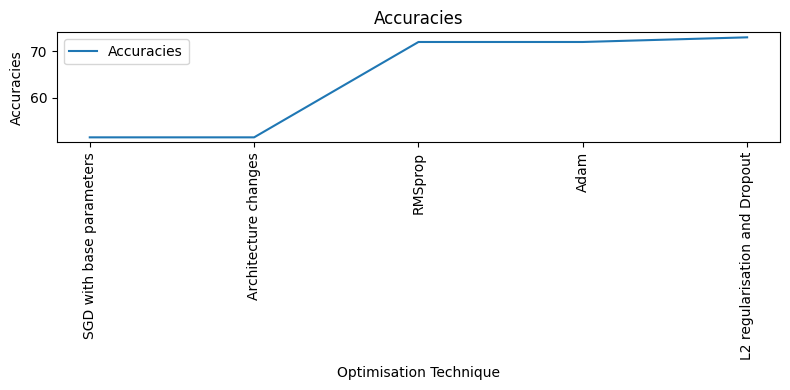

In [157]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import autoviz

def value_plot(df, y, figscale=1):
    plt.figure(figsize=(8 * figscale, 4 * figscale))
    plt.plot(df.iloc[:, 0], df[y], label=y)
    plt.xlabel(df.columns[0])  # Set the x-axis label using the first column name
    plt.xticks(rotation='vertical')  # Rotate x-axis ticks vertically
    plt.ylabel(y)
    plt.title(y)
    plt.legend()
    plt.tight_layout()
    plt.show()
value_plot(f1_df, 'Accuracies')

## For Model 2:
**Approach 1:**
Ensemble model by training and testing Handle data and Tweet data separately and taking a logical OR of the output
Performance: Approach 1 gave an F1 score of 0.85 and accuracy of 85% which is way better than the previous model which gave 72% accuracy and a F1 score of 0.72

**Approach 2:**  
We multiply the Handle data by 5 and append it to the twitter text and perform the above processing steps and run it through a NN model.
Performance: This gave us a superior performance with 99.9%  accuracy and 0.999 F1 score


Find the plot below:

In [159]:
import pandas as pd
F1_score_dict = {'Approaches': ['Approach 1: Ensemble','Approach 2: Handle into text'], 'Accuracies': [85, 99]}
f1_df = pd.DataFrame(data=F1_score_dict)
f1_df

,Approaches,Accuracies
0,Approach 1: Ensemble,85
1,Approach 2: Handle into text,99
